In [4]:
from google.colab import files
uploaded = files.upload()


Saving Test.csv to Test.csv


In [7]:
import os
os.listdir()
import pandas as pd
df = pd.read_csv('Test.csv')
df.head()


,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [9]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline


In [10]:
df = pd.read_csv("Test.csv")

print(df.head())


                                                text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang (Secr...      1
4  when i first read about "berlin am meer" i did...      0


In [16]:
print(df.columns)
import re

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['cleaned_review'] = df['text'].apply(preprocess_text)

print(df[['text', 'cleaned_review']].head())



Index(['text', 'label'], dtype='object')
                                                text  \
0  I always wrote this series off as being a comp...   
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...   
2  This movie was so poorly written and directed ...   
3  The most interesting thing about Miryang (Secr...   
4  when i first read about "berlin am meer" i did...   

                                      cleaned_review  
0  i always wrote this series off as being a comp...  
1  1st watched 1272002  3 out of 10dirsteve purce...  
2  this movie was so poorly written and directed ...  
3  the most interesting thing about miryang secre...  
4  when i first read about berlin am meer i didnt...  


In [17]:
X = df['cleaned_review']
y = df['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)

print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression - Accuracy: 0.862
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       503
           1       0.86      0.86      0.86       497

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



In [20]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')

svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_test_tfidf)

print("SVM - Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM - Accuracy: 0.866
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       503
           1       0.86      0.88      0.87       497

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



In [21]:

print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression - Accuracy: 0.862
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       503
           1       0.86      0.86      0.86       497

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



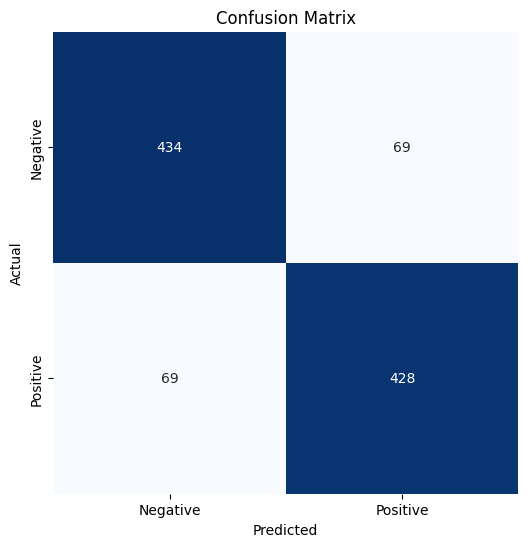

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


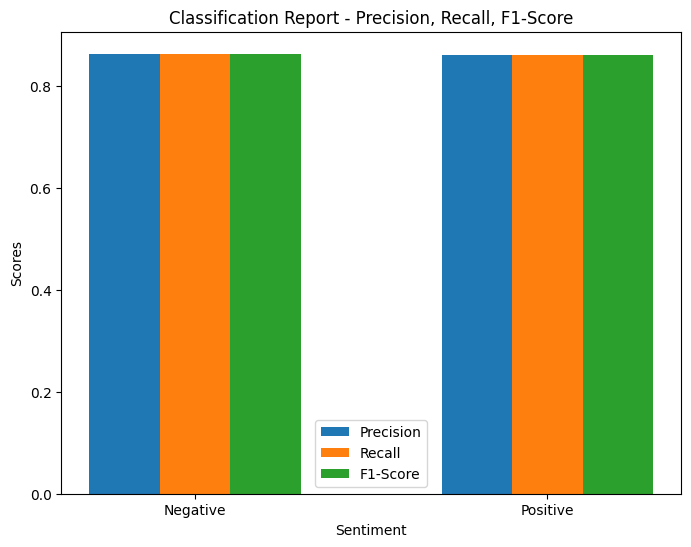

In [24]:
from sklearn.metrics import classification_report
import numpy as np
report = classification_report(y_test, y_pred_lr, output_dict=True)

labels = ['Negative', 'Positive']
precision = [report['0']['precision'], report['1']['precision']]
recall = [report['0']['recall'], report['1']['recall']]
f1_score = [report['0']['f1-score'], report['1']['f1-score']]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Scores')
ax.set_title('Classification Report - Precision, Recall, F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


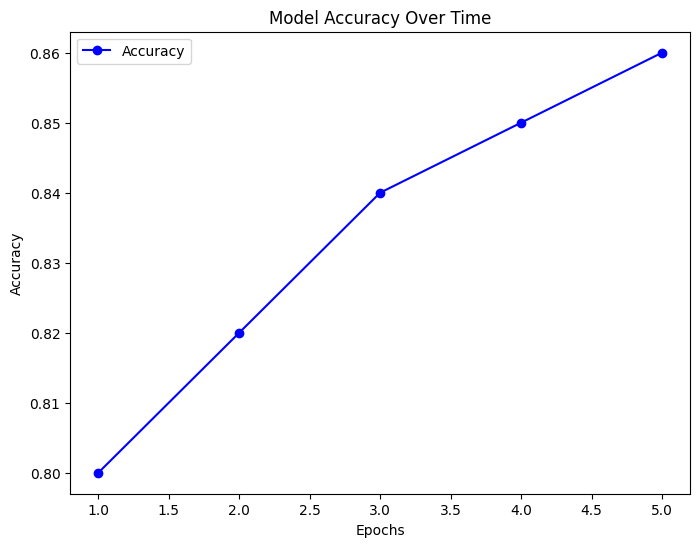

In [26]:
epochs = [1, 2, 3, 4, 5]
accuracy = [0.80, 0.82, 0.84, 0.85, 0.86]

plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='b', label='Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Time')
plt.legend()

plt.show()
